# Are Fandango ratings raised?

In 2015, an analyst a statistical analysis website came up with findings that suggested Fandango's movie rating system was incorrect.  In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

We use below datasets for our analysis,  
movie_ratings_16_17.csv - collected after analyst's analysis

fandango_score_comparison.csv - collected by analyst for his initial analysis

In [13]:
import pandas as pd

ratings_15 = pd.read_csv('fandango_score_comparison.csv')
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [14]:
ratings_15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
ratings_15.shape

(146, 22)

In [8]:
ratings_16_17.shape

(214, 15)

In [9]:
# Options to see all rows and columns

pd.options.display.max_rows = 362 
pd.options.display.max_columns = 37



In [11]:
ratings_15.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [12]:
ratings_16_17.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [26]:
# Slicing the data as data pertaining to only Fandango is required for analysis

ratings_15_upd = ratings_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
ratings_16_17_upd = ratings_16_17[['movie', 'year', 'fandango']].copy()

In [27]:
ratings_15_upd.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [28]:
ratings_16_17_upd.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [29]:
# Creating Year column in ratings_15_upd from FILM column
ratings_15_upd['Year']  = ratings_15_upd['FILM'].str[-5:-1]



In [30]:
ratings_15_upd.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [31]:
ratings_15_upd['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [33]:
ratings_16_17_upd['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [34]:
# Extracting only year 2015 values

fandango_2015 = ratings_15_upd[ratings_15_upd['Year'] == '2015'].copy()


In [35]:
fandango_2015['Year'].value_counts()


2015    129
Name: Year, dtype: int64

In [37]:
fandango_2016 = ratings_16_17_upd[ratings_16_17_upd['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [40]:
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [39]:
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


# Evaluating the distribution of fandango ratings for 2015 and 2016

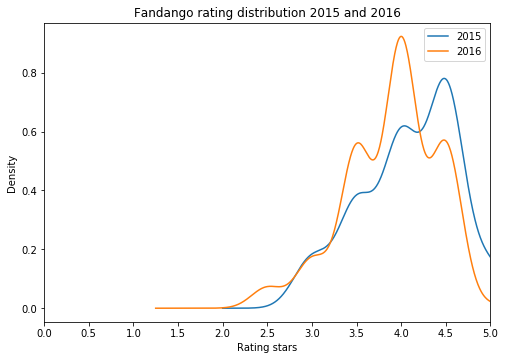

In [45]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True, figsize = (8,5.5))

plt.title("Fandango rating distribution 2015 and 2016")
plt.xlabel("Rating stars")
plt.xlim(0,5) 
plt.xticks(np.arange(0,5.1,.5))
plt.show()



The movie rating distributions for both years look left skewed. This suggests that most of the ratings given were high and very high. Comparing years, the 2016 distribution has a bit left shift when compared to year 2015. Moreover, the ratings in 2016 were given lower compared to 2015.

# Comparing rating frequencies

In [47]:
print("YEAR 2015 - Rating frequency")
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100


YEAR 2015 - Rating frequency


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [49]:
print("YEAR 2016 - Rating frequency")
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

YEAR 2016 - Rating frequency


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There are differences in ratings frequency distributions.

In 2015, about 74% ratings were 4 or higher, compared to 65% in 2016. Another contrast is in 5.0 rating, where only 0.5% of ratings in 2016 compared to 6.9% in 2016.

The minimum rating is also lower in 2016 with 2.5 stars, where as the minimum of 2015 is 3.0 stars. 

In [50]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]  
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


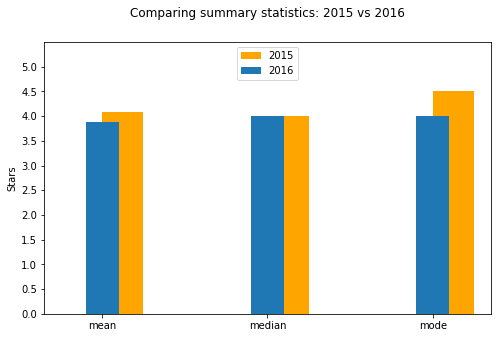

In [61]:

summary['2015'].plot.bar( align = 'edge', label = '2015', width = .25, color="orange")
summary['2016'].plot.bar( label = '2016', width = .2, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

The mean value of ratings is lower in 2016 when compared to 2015, this is similar to the direction of trend seen in KDE plots. 
The median is same for both years, and mode is 0.5 stars lower in 2016.
